### 1) Load necessary Python packages

In [1]:
import os
import sys
import matplotlib.pyplot as plt

# Add the local src directory to the path
sys.path.append('./src/')

# Load the GBA_model class
from Model import *

### 2) Load the model "D" from binary
See the script `csv_to_binary.py` to convert from CSV to binary.

In [2]:
# I previously saved the model as a binary file with the script `csv_to_binary.py`
model = load_model("D")

### 3) Calculate one mean evolutionary trajectory for condition 1
We ask to track the trajectory, and to label it with index 1.
The trajectory is saved in `model.ME_trajectory`.

In [3]:
model.set_f0(model.LP_solution)
model.mean_evolutionary_trajectory(condition ="1", initial_dt=0.0001, track=True, label=1)

> Condition 1: convergence reached (mu=2.2554043381103464, nb iterations=3881)


(True, 3.8851001262664795)

### 4) Run a few MCMC trajectories
We ask to track the trajectories, and we label them with unique indices. We also ask to add them together.
Trajectories are saved in `model.MCMC_trajectories`.

In [4]:
for i in range(1, 6):
    model.set_f0(model.LP_solution)
    model.MCMC(condition="1", max_time=10000, sigma=0.01, N_e=2.5e7, track=True, label=i)

> MCMC simulation was completed
> MCMC simulation was completed
> MCMC simulation was completed
> MCMC simulation was completed
> MCMC simulation was completed


### 5) Plot all trajectories

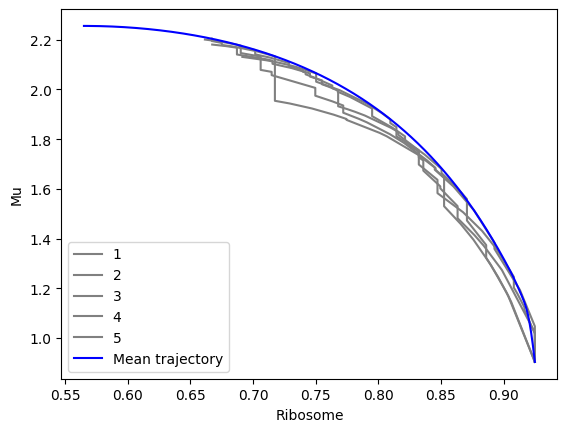

In [6]:
for i in model.MCMC_trajectory["label"].unique():
    df = model.MCMC_trajectory.loc[model.MCMC_trajectory["label"] == i]
    plt.plot(df["Ribosome"], df["mu"], color="grey", label=i)
plt.plot(model.ME_trajectory["Ribosome"], model.ME_trajectory["mu"], color="blue", label="Mean trajectory")
plt.xlabel("Ribosome")
plt.ylabel("Mu")
plt.legend()